In [1]:
from chebGreen.greenlearning.model import *
from chebGreen.chebpy2 import Chebfun2, Chebpy2Preferences
import matplotlib.pyplot as plt

%env TF_MLC_LOGGING=1 
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_MLC_LOGGING=1
env: TF_CPP_MIN_LOG_LEVEL=2


In [2]:
model = GreenNN()
dimension = 1
domain = [-1,1,-1,1]
layerConfig = [50,50,50,50]
activation = 'rational'
homogeneousBC = False
loadPath = 'savedModels/frac'
model.build(dimension, domain, layerConfig, activation, homogeneousBC, loadPath)

In [3]:
%%time
cheb2prefs = Chebpy2Preferences()
# cheb2prefs.prefx.eps = 1e-6
# cheb2prefs.prefx.eps = 1e-6
g = Chebfun2(model.evaluateG, domain = domain, prefs = cheb2prefs, simplify = False)

CPU times: user 1.25 s, sys: 317 ms, total: 1.57 s
Wall time: 1.68 s


In [4]:
g

chebfun2 object
     domain       rank               corner values
[-1,1] x [-1,1]     193       [2.268 2.165 2.165 2.272]
vertical scale = 2.295919

2.295919


(0.0, 1.0)

<Figure size 800x600 with 0 Axes>

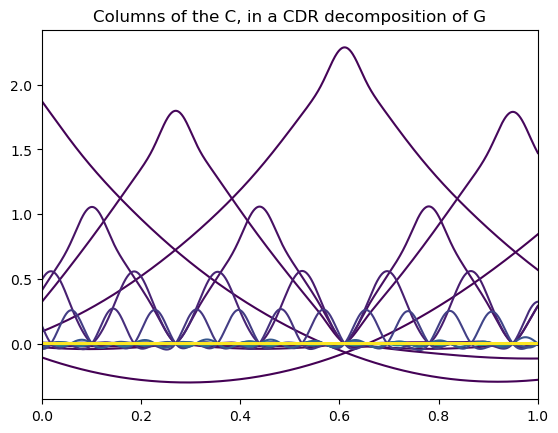

In [5]:
i = slice(0,-1)
fig = plt.figure(figsize = (8,6))
g.cols[:,i].plot()
print(np.max(g.cols[:,i].vscale))
plt.title(f'Columns of the C, in a CDR decomposition of G')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [6]:
%%time
u,s,v = g.svd()

CPU times: user 7.75 s, sys: 6.57 s, total: 14.3 s
Wall time: 4.46 s


1.2049579278379603


(0.0, 1.0)

<Figure size 800x600 with 0 Axes>

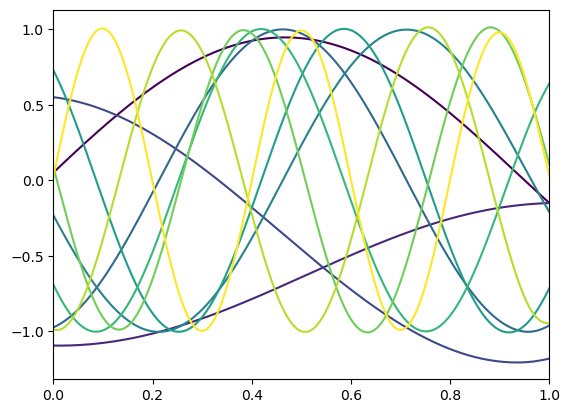

In [7]:
# i = slice(10,20)
i = slice(0,10)
# i = 16
fig = plt.figure(figsize = (8,6))
u[:,i].plot()
print(np.max(u[:,i].vscale))
# plt.title(f'First {i+1} left singular functions for a Laplacian')
plt.xlim([0,1])
# fig.savefig(f'Laplace-first.png', dpi = fig.dpi)

In [8]:
u[0,i]

array([ 0.05218405, -1.0931467 ,  0.55011426, -0.97252481, -0.23248269,
        0.72715934, -0.69137815,  0.08515488, -0.98674058,  0.0264572 ])

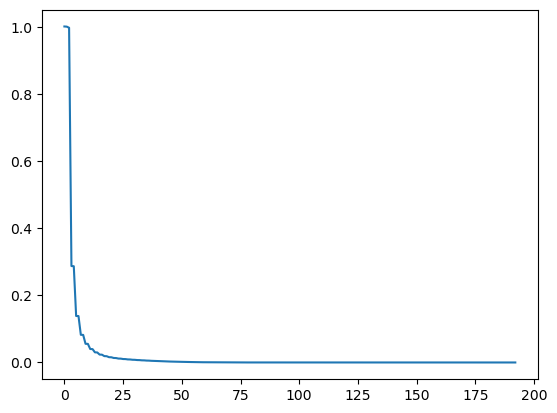

In [9]:
plt.figure()
plt.plot(s)

In [10]:
xx = np.linspace(domain[0],domain[1],2000)
yy = np.linspace(domain[2],domain[3],2000)
x, y = np.meshgrid(xx,yy)

CPU times: user 2.01 s, sys: 339 ms, total: 2.34 s
Wall time: 2.32 s


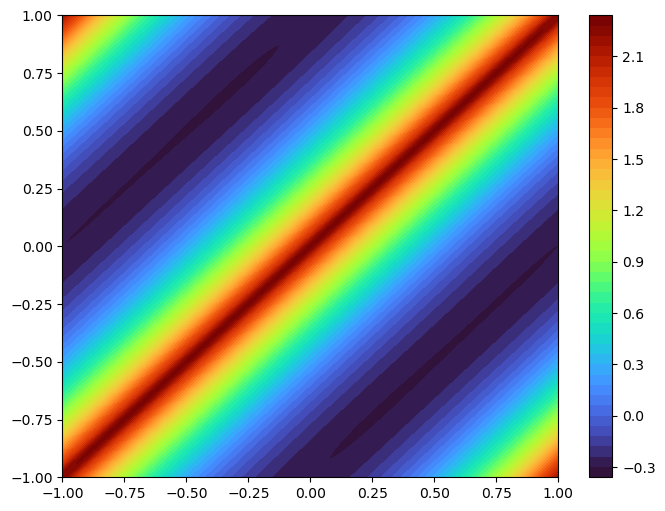

In [11]:
%%time
Gneural = model.evaluateG(x,y)

fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,Gneural, 50, cmap = 'turbo', vmin = np.min(Gneural), vmax = np.max(Gneural))
plt.colorbar()
# fig.savefig(f'poisson_greenlearning.png', dpi = fig.dpi)

CPU times: user 4.54 s, sys: 3.22 s, total: 7.77 s
Wall time: 2.89 s


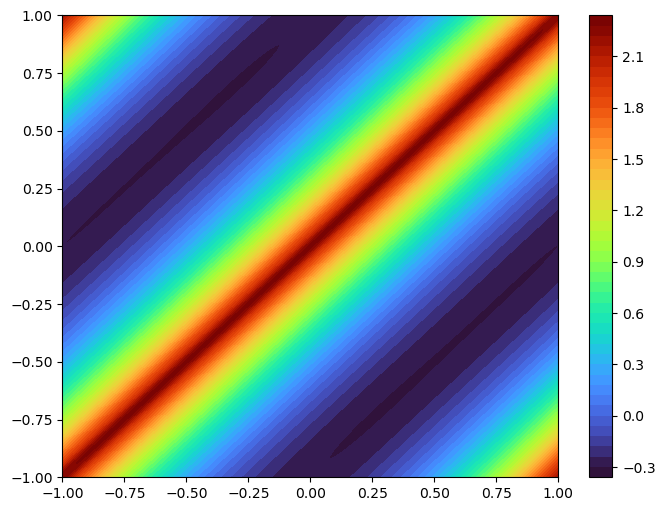

In [12]:
%%time
G = g[x,y]
fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()
# fig.savefig(f'poisson_greenlearning_chebfun2.png', dpi = fig.dpi)